In [1]:
from google.colab import drive
import os
import zipfile

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
zip_file_path = '/content/drive/My Drive/ML_Hackathon/68e8d1d70b66d_student_resource.zip'

In [7]:
unzip_path = '/content/'

In [8]:
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_path)

print("Files have been unzipped successfully.")

Files have been unzipped successfully.


In [9]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
import numpy as np

# Base path to your data, based on the unzipped folder structure
base_path = '/content/68e8d1d70b66d_student_resource/student_resource'

In [11]:
train_df = pd.read_csv("/content/student_resource/dataset/train.csv")
test_df = pd.read_csv("/content/student_resource/dataset/test.csv")

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sample_id        75000 non-null  int64  
 1   catalog_content  75000 non-null  object 
 2   image_link       75000 non-null  object 
 3   price            75000 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.3+ MB


In [13]:
train_df.describe()

,sample_id,price
count,75000.000000,75000.000000
mean,149841.917707,23.647654
std,86585.346513,33.376932
min,0.000000,0.130000
25%,73845.750000,6.795000
50%,150129.000000,14.000000
75%,225040.250000,28.625000
max,299438.000000,2796.000000


In [14]:
train_df.head()

,sample_id,catalog_content,image_link,price
0,33127,"Item Name: La Victoria Green Taco Sauce Mild, ...",https://m.media-amazon.com/images/I/51mo8htwTH...,4.89
1,198967,"Item Name: Salerno Cookies, The Original Butte...",https://m.media-amazon.com/images/I/71YtriIHAA...,13.12
2,261251,"Item Name: Bear Creek Hearty Soup Bowl, Creamy...",https://m.media-amazon.com/images/I/51+PFEe-w-...,1.97
3,55858,Item Name: Judee’s Blue Cheese Powder 11.25 oz...,https://m.media-amazon.com/images/I/41mu0HAToD...,30.34
4,292686,"Item Name: kedem Sherry Cooking Wine, 12.7 Oun...",https://m.media-amazon.com/images/I/41sA037+Qv...,66.49


In [16]:
train_df["catalog_content"][0]

'Item Name: La Victoria Green Taco Sauce Mild, 12 Ounce (Pack of 6)\nValue: 72.0\nUnit: Fl Oz\n'

In [17]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sample_id        75000 non-null  int64 
 1   catalog_content  75000 non-null  object
 2   image_link       75000 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

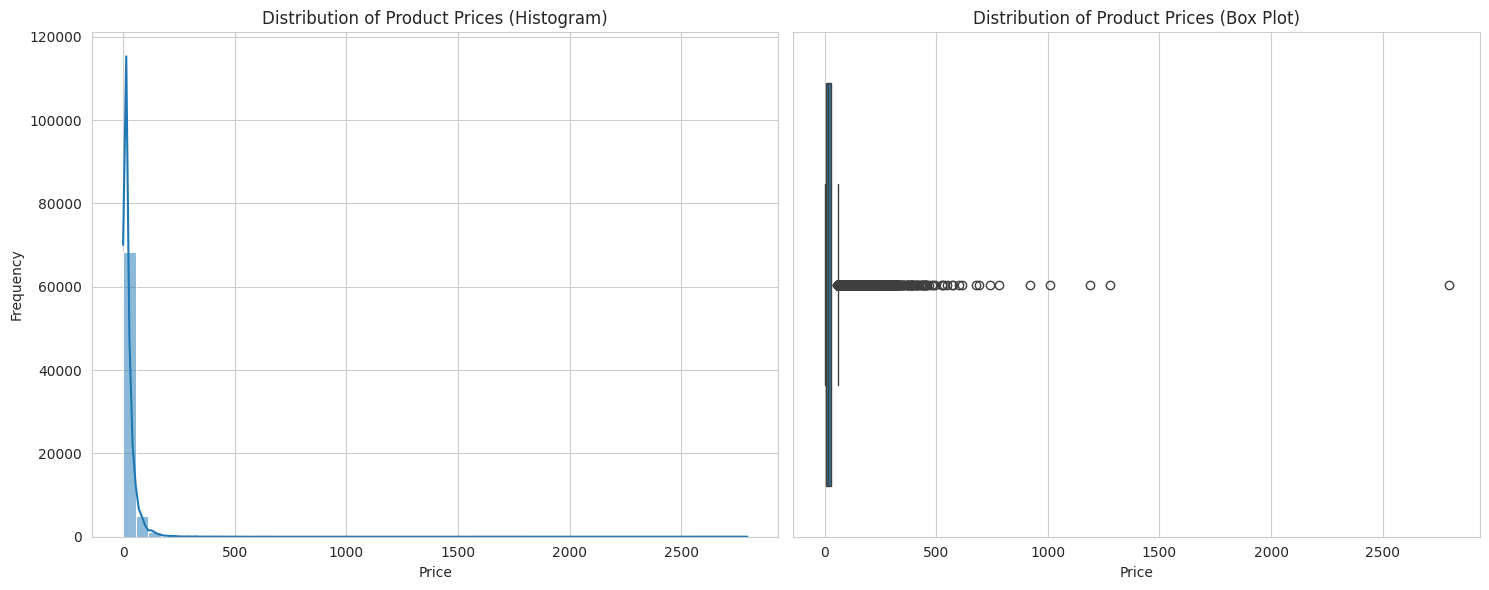

In [20]:
sns.set_style("whitegrid")

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot a histogram of the price
sns.histplot(train_df['price'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Product Prices (Histogram)')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')
# Plot a box plot of the price to spot outliers
sns.boxplot(x=train_df['price'], ax=axes[1])
axes[1].set_title('Distribution of Product Prices (Box Plot)')
axes[1].set_xlabel('Price')

plt.tight_layout()
plt.show()


In [21]:
train_df['word_count'] = train_df['catalog_content'].str.split().str.len()

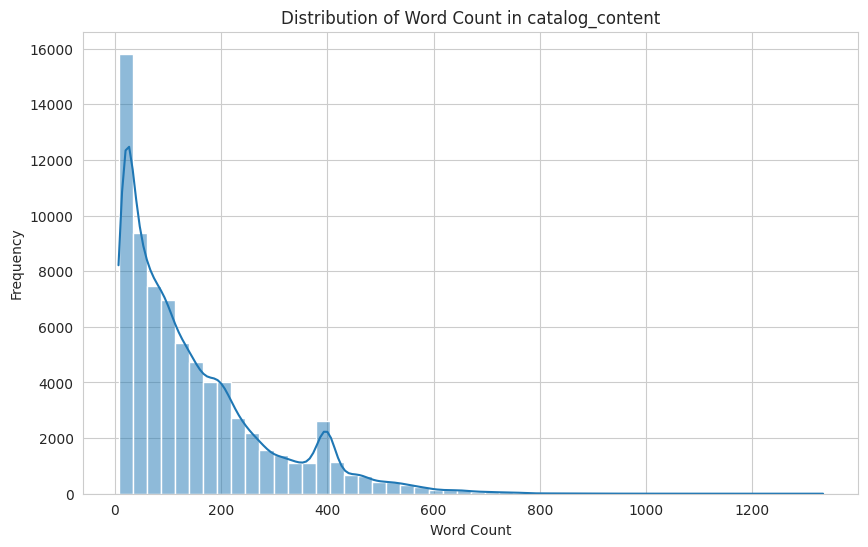

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['word_count'], bins=50, kde=True)
plt.title('Distribution of Word Count in catalog_content')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

In [23]:
train_df["word_count"].describe()

,word_count
count,75000.000000
mean,147.851693
std,137.068731
min,7.000000
25%,42.000000
50%,104.000000
75%,208.000000
max,1333.000000


In [24]:
from collections import Counter
all_words = ' '.join(train_df['catalog_content'].fillna('')).split()
most_common_words = Counter(all_words).most_common(20)

print("\n--- Most Common Words in catalog_content ---")
print(most_common_words)


--- Most Common Words in catalog_content ---
[('and', 328358), ('Bullet', 267663), ('Point', 261454), ('of', 208248), ('the', 207247), ('a', 191022), ('to', 162957), ('for', 131945), ('with', 130231), ('in', 107994), ('is', 92262), ('-', 78142), ('Item', 77131), ('your', 75418), ('Name:', 75168), ('Value:', 75023), ('Unit:', 75014), ('or', 73811), ('are', 65119), ('2:', 54516)]


In [25]:
import numpy as np

# Apply the log transformation to the 'price' column in the training data
train_df['log_price'] = np.log1p(train_df['price'])
train_df.head()

,sample_id,catalog_content,image_link,price,word_count,log_price
0,33127,"Item Name: La Victoria Green Taco Sauce Mild, ...",https://m.media-amazon.com/images/I/51mo8htwTH...,4.89,18,1.773256
1,198967,"Item Name: Salerno Cookies, The Original Butte...",https://m.media-amazon.com/images/I/71YtriIHAA...,13.12,80,2.647592
2,261251,"Item Name: Bear Creek Hearty Soup Bowl, Creamy...",https://m.media-amazon.com/images/I/51+PFEe-w-...,1.97,59,1.088562
3,55858,Item Name: Judee’s Blue Cheese Powder 11.25 oz...,https://m.media-amazon.com/images/I/41mu0HAToD...,30.34,211,3.444895
4,292686,"Item Name: kedem Sherry Cooking Wine, 12.7 Oun...",https://m.media-amazon.com/images/I/41sA037+Qv...,66.49,28,4.211979


In [26]:
train_df["log_price"].describe()

,log_price
count,75000.000000
mean,2.739217
std,0.942032
min,0.122218
25%,2.053483
50%,2.708050
75%,3.388619
max,7.936303


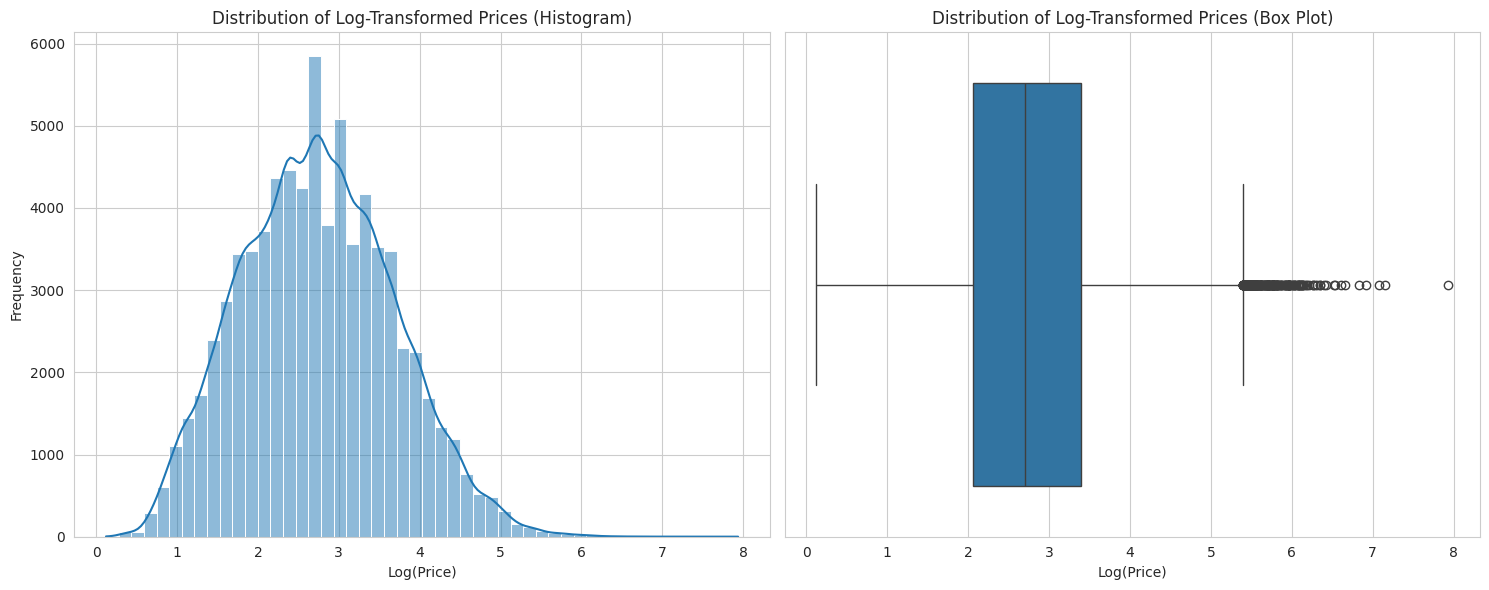

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(train_df['log_price'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Log-Transformed Prices (Histogram)')
axes[0].set_xlabel('Log(Price)')
axes[0].set_ylabel('Frequency')

sns.boxplot(x=train_df['log_price'], ax=axes[1])
axes[1].set_title('Distribution of Log-Transformed Prices (Box Plot)')
axes[1].set_xlabel('Log(Price)')

plt.tight_layout()
plt.show()

In [28]:
import string
import re
import random

# Get 5 random samples to inspect
sample_indices = random.sample(range(len(train_df)), 5)
print("--- Checking for Punctuation and Special Characters ---")
for i in sample_indices:
    text = train_df['catalog_content'][i]
    # Use a regular expression to find all punctuation characters
    punctuation_found = re.findall(f'[{re.escape(string.punctuation)}]', text)
    print(f"Sample {i}: Punctuation found: {set(punctuation_found)}")

--- Checking for Punctuation and Special Characters ---
Sample 59042: Punctuation found: {'-', '.', ':', '%', ','}
Sample 42866: Punctuation found: {',', '.', ':'}
Sample 846: Punctuation found: {',', '.', '-', ':'}
Sample 36124: Punctuation found: {'(', ';', '.', ':', ')', ',', "'"}
Sample 21637: Punctuation found: {'(', '.', ':', ')', ',', "'"}


In [30]:
# Check for "Item Name:", "Value:", "Unit:" patterns
print("\n--- Checking for Data Labels ---")
print(f"Contains 'Item Name:' pattern: {train_df['catalog_content'].str.contains('Item Name:', na=False).sum()}")
print(f"Contains 'Value:' pattern: {train_df['catalog_content'].str.contains('Value:', na=False).sum()}")
print(f"Contains 'Unit:' pattern: {train_df['catalog_content'].str.contains('Unit:', na=False).sum()}")


--- Checking for Data Labels ---
Contains 'Item Name:' pattern: 74993
Contains 'Value:' pattern: 75000
Contains 'Unit:' pattern: 75000


In [32]:
# Check for HTML tags
print("\n--- Checking for HTML Tags ---")
html_tags_present = train_df['catalog_content'].str.contains('<.*?>', na=False).sum()
print(f"HTML tags are present: {html_tags_present}")

# Check for URLs
print("\n--- Checking for URLs ---")
urls_present = train_df['catalog_content'].str.contains('http[s]?://\S+|www\.\S+', na=False).sum()
print(f"URLs are present: {urls_present}")

<>:8: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\S'
/tmp/ipython-input-235347111.py:8: SyntaxWarning: invalid escape sequence '\S'
  urls_present = train_df['catalog_content'].str.contains('http[s]?://\S+|www\.\S+', na=False).sum()



--- Checking for HTML Tags ---
HTML tags are present: 4623

--- Checking for URLs ---
URLs are present: 408


In [45]:
import re
import string

def clean_text_final(text):
    text = str(text).lower()

    # 1. Handle common punctuation and symbols first
    text = re.sub(r'\'', '', text)  # Remove apostrophes

    # Remove unwanted patterns
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'http[s]?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)

    # Remove specific labels or prefixes
    text = re.sub(r'(item name:|value:|unit:|bullet point:\s*\d+|bullet point)', '', text)

    # Replace newlines and hyphens with a space
    text = re.sub(r'[\n\-]', ' ', text)

    # Remove all unwanted punctuation except '.' in numbers.
    # This regex removes everything that is NOT a lowercase letter, a number, a space, or a decimal point.
    text = re.sub(r'[^a-z0-9\s\.]', ' ', text)

    # Normalize whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [46]:
import pandas as pd
import random

# Assume train_df and test_df are loaded and clean_text_final_fixed is defined
train_df['clean_catalog_content'] = train_df['catalog_content'].apply(clean_text_final)
test_df['clean_catalog_content'] = test_df['catalog_content'].apply(clean_text_final)

# Find samples with numbers to check if the decimal point is handled
samples_with_decimals = train_df[train_df['catalog_content'].str.contains(r'\d+\.\d+', na=False, regex=True)].index.tolist()

if samples_with_decimals:
    random_index = random.choice(samples_with_decimals)
    original_text = train_df.loc[random_index, 'catalog_content']
    cleaned_text = train_df.loc[random_index, 'clean_catalog_content']

    print(f"--- Checking a random sample with a decimal (Index: {random_index}) ---")
    print("Original Text:", original_text)
    print("Cleaned Text:", cleaned_text)
else:
    print("No samples with decimal numbers found for this check.")

--- Checking a random sample with a decimal (Index: 55402) ---
Original Text: Item Name: King's Cupboard Cream Caramel Sauce - The Perfect Sauce for Ice Cream, Fruit Dip, Topping Desserts, Caramel Drizzle for Coffee - Gluten-Free, Kosher, All Natural Ingredients, 10.4 oz
Bullet Point 1: Pure Ingredients - Our Cream Caramel Sauce is made with fresh Montana cream, sweet butter, and deeply caramelized sugar. We use only non-GMO ingredients and no additives or preservatives
Bullet Point 2: Kosher and Gluten-Free - Our caramel sauce recipe is made in the USA, Kosher Certified by the Orthodox Union, and gluten-free so you can enjoy more of what you crave
Bullet Point 3: Top Desserts - Creamy and smooth with a classic caramel flavor, this is the perfect sauce for ice cream, blended in a shake, on top of cakes, and used as a caramel sauce for dipping apples and other fruit
Bullet Point 4: Coffee Drizzle - Caramel drizzle for coffee, anyone? Create coffee at home that rivals the café. Use our a

In [49]:
train_df.columns

Index(['sample_id', 'catalog_content', 'image_link', 'price', 'word_count',
       'log_price', 'clean_catalog_content'],
      dtype='object')

In [50]:
test_df.columns

Index(['sample_id', 'catalog_content', 'image_link', 'clean_catalog_content'], dtype='object')

In [47]:
import string
import random

# Choose a random sample from the dataset
random_index = random.randint(0, len(train_df) - 1)
sample_text = train_df['catalog_content'][random_index]
cleaned_text = clean_text_final(sample_text)

print(f"--- Checking a random sample (Index: {random_index}) ---")
print("Original Text:", sample_text)
print("Cleaned Text:", cleaned_text)

# Check if any punctuation remains in the cleaned text
remaining_punctuation = set(cleaned_text).intersection(set(string.punctuation))
print(f"\nRemaining punctuation in cleaned text: {remaining_punctuation}")

--- Checking a random sample (Index: 70335) ---
Original Text: Item Name: Cafe Rico Regular Instant Coffee, Medium-dark Roast, in Glass Jar, 3.6 Ounce (Pack of 1)
Bullet Point 1: Convenient packaging - premium 3.6 oz glass jar always keeping the coffee fresh
Bullet Point 2: Favored accross the Caribbean - medium-dark roast profile is a favorite among bold flavored coffee lovers
Bullet Point 3: Decadent taste - one of the strongest brands in Puerto Rico, bold and aromatic
Bullet Point 4: Historical perserverance - founded in 1924 by Ramon S. Torres Velez in San Juan keeping strong relationships with local coffee growers
Bullet Point 5: The traditional flavor - el sabor tradicional del mejor cafe
Product Description: Café Rico is a favorite for bold flavored coffee lovers across the Caribbean and elsewhere. Its steady and persistent growth still stands, making Café Rico one of the strongest brands in Puerto Rico. Tasting profile: Medium-dark roast. Bold and aromatic. Available regular, d

In [48]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
import numpy as np
import re
import string

In [51]:
# Prepare the data for the model
X_train_text = train_df['clean_catalog_content'].fillna('')
X_test_text = test_df['clean_catalog_content'].fillna('')
y_train_log = train_df['log_price']

In [52]:
tfidf_vectorizer = TfidfVectorizer(
    ngram_range=(1, 2),
    max_features=15000,
    stop_words='english',
)

In [53]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_text)
X_test_tfidf = tfidf_vectorizer.transform(X_test_text)

In [54]:
# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train_tfidf, y_train_log)

LinearRegression()

In [55]:
# Make predictions and inverse transform them
predictions_log = model.predict(X_test_tfidf)
final_predictions = np.expm1(predictions_log)
final_predictions[final_predictions < 0] = 0.01

In [56]:
submission_df = pd.DataFrame({
    'sample_id': test_df['sample_id'],
    'price': final_predictions
})
submission_df.to_csv('test_out_improved_text.csv', index=False)
print("New submission file created with improved text features!")

New submission file created with improved text features!


In [57]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Assuming train_df has 'clean_catalog_content' and 'log_price' columns
X_train_full = train_df['clean_catalog_content']
y_train_log_full = train_df['log_price']

# Split the data (80% for training, 20% for validation)
X_train_subset, X_val, y_train_log_subset, y_val_log = train_test_split(
    X_train_full,
    y_train_log_full,
    test_size=0.2,
    random_state=42
)

print(f"New Training set size: {len(X_train_subset)}")
print(f"Validation set size: {len(X_val)}")

New Training set size: 60000
Validation set size: 15000


In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression

# Create TF-IDF features based on the new subsets
tfidf_vectorizer_val = TfidfVectorizer(
    ngram_range=(1, 2),
    max_features=15000,
    stop_words='english',
)

X_train_subset_tfidf = tfidf_vectorizer_val.fit_transform(X_train_subset)
X_val_tfidf = tfidf_vectorizer_val.transform(X_val)

# Train the model
model_val = LinearRegression()
model_val.fit(X_train_subset_tfidf, y_train_log_subset)

# Make predictions on the validation set and inverse transform
predictions_val_log = model_val.predict(X_val_tfidf)
predictions_val = np.expm1(predictions_val_log)
predictions_val[predictions_val < 0] = 0.01

# Inverse transform the actual prices for comparison
y_val = np.expm1(y_val_log)

In [59]:
def smape_score(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    smape = np.mean(np.abs(y_pred - y_true) / denominator) * 100
    return smape

smape = smape_score(y_val, predictions_val)
print(f"Your model's SMAPE score on the validation set is: {smape:.2f}%")

Your model's SMAPE score on the validation set is: 60.77%
